## ESTANDARIZACION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None 


/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Cargamos el dataframe con el que vamos a trabajar.
df = pd.read_csv("../ficheros/diamons_01.csv", index_col = 0).reset_index(drop= True) 
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


Como decidimos no quitar todos los outlieers y no sustituirlos por la media, porque en este caso no tendría sentido, vamos a usar directamente el método de estandarización RobustScaler, que usa solamente mediana y rango intercuartílico.  

In [3]:
# Nos quedamos con las cariable numéricas tomaremos todas menos el price ya que es la variable respuesta
numericas = df.select_dtypes(include = np.number).drop("price", axis=1) 
numericas.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [4]:
# construimos el modelo de escalador
robust = RobustScaler()
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)
# transformamos los datos
X_robust = robust.transform(numericas)

In [5]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,carat,depth,table,x,y,z
0,-0.746032,-0.214286,-0.666667,-0.931818,-0.91954,-0.909091
1,-0.777778,-1.428571,1.333333,-0.965909,-1.00000,-1.018182


In [6]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {round(numericas_robust[columna].mean(),2)}')
    print(f'La desviación estándar de la columna {columna} es: {round(numericas_robust[columna].std(),2)}')
    print("-------------------------------------------------------------")

La media de la columna carat es:  0.04
La desviación estándar de la columna carat es: 0.61
-------------------------------------------------------------
La media de la columna depth es:  -0.03
La desviación estándar de la columna depth es: 1.02
-------------------------------------------------------------
La media de la columna table es:  0.14
La desviación estándar de la columna table es: 0.74
-------------------------------------------------------------
La media de la columna x es:  -0.0
La desviación estándar de la columna x es: 0.56
-------------------------------------------------------------
La media de la columna y es:  0.0
La desviación estándar de la columna y es: 0.57
-------------------------------------------------------------
La media de la columna z es:  0.02
La desviación estándar de la columna z es: 0.56
-------------------------------------------------------------


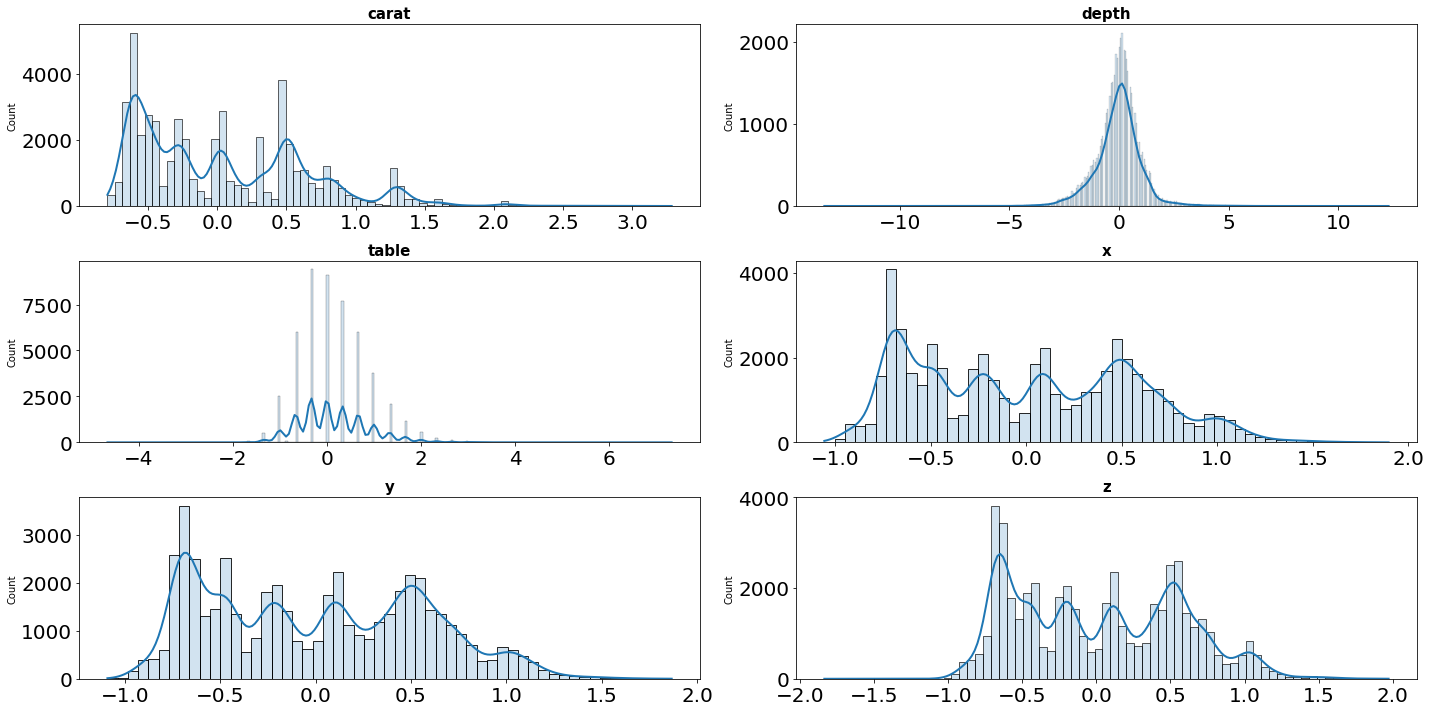

In [7]:
# Hacemos las gráficas de las columnas estandarizadas
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()


Hacemos las gráficas antes de la estandarización, para poder compararlas

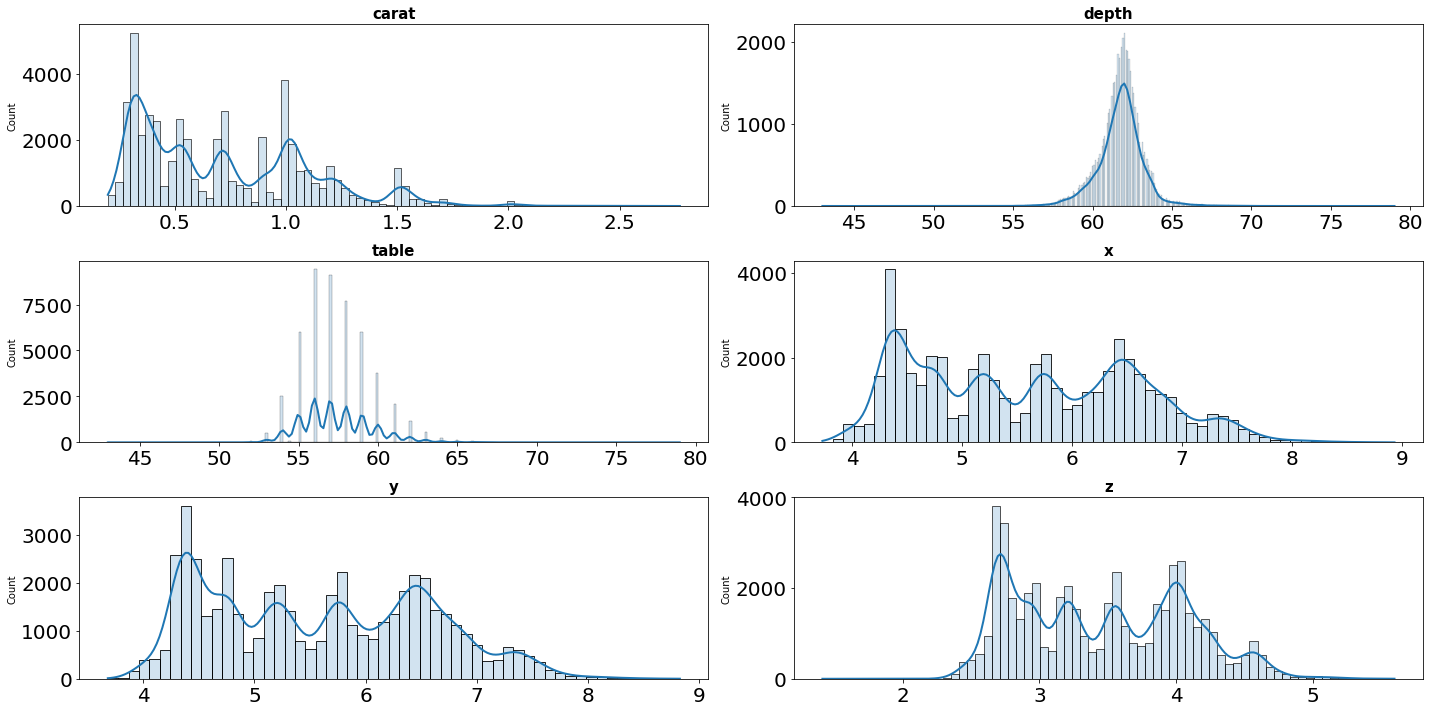

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 10))
columnas_df = df.select_dtypes(include=np.number).columns.tolist()
columnas_df.remove("price")
axes = axes.flat


for i, colum in enumerate(columnas_df): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [8]:
#Vamos a modificar las columnas que teniamos por las columnas ya estandarizadas
df[numericas_robust.columns] = numericas_robust
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,-0.746032,Ideal,E,SI2,-0.214286,-0.666667,326,-0.931818,-0.919540,-0.909091
1,-0.777778,Premium,E,SI1,-1.428571,1.333333,326,-0.965909,-1.000000,-1.018182
2,-0.746032,Good,E,VS1,-3.500000,2.666667,327,-0.875000,-0.867816,-1.018182
3,-0.650794,Premium,I,VS2,0.428571,0.333333,334,-0.789773,-0.775862,-0.727273
4,-0.619048,Good,J,SI2,1.071429,0.333333,335,-0.710227,-0.706897,-0.618182


In [9]:
# Comprobamos que no haya nulos antes de guardar
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
#Guardamos los datos para tener un csv con, los datos originales y otro con ellos estandarizados
df.to_csv("../ficheros/diamons_estandarizados.csv")